In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import preprocessing
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# set random seed for reproducibility
random.seed(47)

# LOAD DATA

In [51]:
labels = pd.read_csv("DataFrames/LABELS.csv")
labels = labels.drop("Unnamed: 0", axis=1)
labels

,Trial,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
437,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
438,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
439,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


In [52]:
discrete_df = pd.read_csv("DataFrames/DISCRETE_DF.csv")
discrete_df

,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95
0,0,-0.035476,-0.014832,0.001239,0.006294,0.022321,-0.014059,-0.006005,-0.001494,0.009793,...,0.166572,0.168006,0.168394,0.168803,0.169898,0.393390,0.396053,0.397078,0.397685,0.399236
1,1,-0.045250,-0.011618,0.007241,0.021920,0.039469,-0.032908,-0.018692,-0.004400,0.016925,...,0.118931,0.119262,0.119440,0.119729,0.120152,0.447020,0.448481,0.448987,0.449361,0.449665
2,2,-0.036294,-0.016094,-0.001998,0.015953,0.030454,-0.028781,-0.007606,0.012587,0.026449,...,0.119397,0.120237,0.120485,0.120695,0.121028,0.448677,0.450247,0.450663,0.450932,0.451604
3,3,-0.039694,-0.012562,0.002324,0.027734,0.067174,-0.038574,-0.023681,-0.008450,0.024671,...,0.118274,0.120114,0.120551,0.121043,0.121983,0.444181,0.448774,0.450143,0.451004,0.452016
4,4,-0.051618,-0.002211,0.024441,0.057781,0.084840,-0.057600,-0.041750,-0.021137,0.005952,...,0.138715,0.146647,0.157845,0.159046,0.160538,0.352072,0.354211,0.355657,0.376376,0.384446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057490,0.062577,0.118079,0.120300,0.121256,0.400102,0.409177,0.449528,0.451257,0.457321
380,380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063171,0.063710,0.064096,0.128646,0.132145,0.435032,0.449614,0.456722,0.457518,0.458682
381,381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.139492,0.140109,0.140662,0.141963,0.180167,0.397403,0.399714,0.400644,0.435467,0.621981
382,382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133053,0.134456,0.134922,0.135403,0.155573,0.574477,0.612024,0.613420,0.613976,0.615383


In [53]:
discrete_df_extended = pd.read_csv("DataFrames/DISCRETE_DF_extended.csv")
discrete_df_extended

,Unnamed: 0,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95
0,0,-0.007887,-0.001361,0.000423,0.001995,0.008748,-0.008450,-0.003387,-0.000387,0.002439,...,0.116913,0.136216,0.168268,0.168765,0.169720,0.394498,0.396970,0.397752,0.410795,0.448962
1,1,-0.016553,-0.002183,-0.000336,0.002504,0.021144,-0.016460,-0.004492,-0.000055,0.003817,...,0.119107,0.119935,0.156415,0.157206,0.161510,0.384122,0.386378,0.387804,0.447296,0.449612
2,2,-0.019709,-0.001825,0.000349,0.003092,0.015114,-0.011166,-0.003587,-0.000745,0.002158,...,0.119384,0.120325,0.120532,0.120838,0.121757,0.447108,0.449957,0.450557,0.451011,0.451742
3,3,-0.024281,-0.002406,0.000448,0.002922,0.012956,-0.015800,-0.004344,-0.000039,0.003062,...,0.119037,0.120158,0.120517,0.120906,0.122114,0.445222,0.449603,0.450496,0.450999,0.451988
4,4,-0.012897,-0.001092,0.000723,0.003674,0.035301,-0.033995,-0.005891,-0.002075,0.001226,...,0.116736,0.119651,0.119880,0.138843,0.159017,0.354402,0.386744,0.447999,0.448625,0.449218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.062509,0.063787,0.064083,0.066834,0.119994,0.409666,0.443675,0.456518,0.457465,0.458240
380,380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063745,0.139279,0.141305,0.145522,0.153175,0.395103,0.401436,0.418618,0.429420,0.457234
381,381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.134250,0.134792,0.135139,0.138745,0.157438,0.399996,0.589602,0.613193,0.613976,0.632069
382,382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.134636,0.233363,0.234264,0.234667,0.235493,0.473973,0.474918,0.475529,0.476562,0.613805


# REMOVE UN-NECESSARY COLUMNS

In [54]:
# Match and add labels 

# Remove unmatched labels (manual)
new_labels = labels.loc[(labels['Rat']!="RM13") | (labels["Session"]!="S3") | (labels['Date']!=20)]

# Remove non-class columns
new_labels.reset_index(inplace=True, drop=True)
new_labels

,Trial,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,46.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
380,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
381,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
382,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


# Preprocess Data

In [55]:
def pre(discrete_df):
    # rm 50 percentile for xyz_rob and sensor because it is just the handle position or does not give us any new information
    for col in discrete_df.columns:
        if (col == "Unnamed: 0") or ("_rob_p50" in col) or ("_sensor_p50" in col):
            discrete_df = discrete_df.drop(col, axis=1)
    
    # standardize
    discrete_df2 = StandardScaler().fit_transform(discrete_df)
    discrete_df = pd.DataFrame(discrete_df2, columns = discrete_df.columns)

    return discrete_df

In [56]:
# rm 50 percentile for xyz_rob and sensor because it is just the handle position or does not give us any new information
#for col in discrete_df.columns:
#    if (col == "Unnamed: 0") or ("_rob_p50" in col) or ("_sensor_p50" in col):
#        discrete_df = discrete_df.drop(col, axis=1)
        
#discrete_df

In [57]:
## Standardizing the features
"""
Each feature of your data should be normally distributed 
such that it will scale the distribution to a mean of zero and a standard deviation of one.
"""
#discrete_df2 = StandardScaler().fit_transform(discrete_df)
#discrete_df = pd.DataFrame(discrete_df2, columns = discrete_df.columns)
#discrete_df

'\nEach feature of your data should be normally distributed \nsuch that it will scale the distribution to a mean of zero and a standard deviation of one.\n'

# DEFINE PCA FUCNTION

In [58]:
def doPCA(df, n):
    """
    Performs PCA on df. """
    pca = PCA(n_components=n)
    components = pca.fit_transform(df)
    PCA_col_names = ["PC" + str(x) for x in range(1, pca.n_components_+1)]
    pca_df = pd.DataFrame(components, columns=PCA_col_names)

    pca_df = pd.concat([pca_df, new_labels], axis=1)
    
    return pca_df

### DO PCA

In [59]:
# do pca on all features
data = doPCA(pre(discrete_df), None)
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,-8.290526,-9.224430,-1.762426,1.049623,-4.574921,5.671087,5.711493,-4.813216,-0.805555,0.750168,...,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-24.890528,10.101036,-0.916601,-0.501549,3.241741,-2.938186,-2.004111,0.363024,-0.105066,0.833075,...,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
380,-24.934423,10.156373,-0.958768,-0.529223,3.247984,-2.980272,-2.010161,0.357387,-0.033360,0.873913,...,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
381,-25.015489,10.254962,-1.042526,-0.601094,3.285232,-3.065936,-2.042245,0.380357,0.102797,1.011708,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
382,-24.948585,10.232479,-0.981323,-0.522696,3.292314,-3.069122,-1.883164,0.235879,0.095495,0.842896,...,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


In [60]:
data_extended = doPCA(pre(discrete_df_extended), None)
data_extended

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-16.112208,-10.821105,-2.899471,4.954374,6.501677,1.436726,7.510820,-1.444535,-1.811608,0.826400,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,-11.376868,-9.869008,-5.894768,-1.137910,4.675638,-8.657370,7.341026,-5.118645,-1.816654,1.264443,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,-7.797103,-1.044952,-4.461393,-4.446190,-3.271765,2.617972,0.305643,5.167860,0.131906,-0.750845,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-8.000412,-11.369783,-0.517317,4.644007,2.296892,6.517055,6.050995,2.719190,1.598218,2.291740,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,-11.804895,-12.132714,-3.083092,3.569628,4.065478,1.354075,7.263697,-0.359086,-0.462053,0.984642,...,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-26.025277,11.100170,4.944824,-2.267007,2.136077,-1.111861,-1.200311,-0.888144,0.590156,-0.238568,...,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
380,-26.116015,11.236775,4.928527,-2.360668,2.141292,-1.182418,-1.278835,-0.871556,0.454799,-0.257369,...,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
381,-26.080733,11.229083,4.936917,-2.462996,2.212533,-1.090896,-1.285079,-0.956094,0.536457,-0.364188,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
382,-26.116267,11.322882,4.935405,-2.539738,2.242934,-1.114456,-1.322463,-0.905421,0.511843,-0.426995,...,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


# DO PCA ON DISCRETE DATA

In [108]:
def plotPCAROC(data, y_name, maximum):
    # define data holding lists
    all_chance = []
    all_trainAcc = []
    all_valAcc = []
    all_ROC = []
    all_ROCAUC = []
    min = 3
    max = maximum
    NumPCsArray = range(min, max)


    # for each # of PCs 1, 2...n to use
    for n in NumPCsArray:
        # get y
        y = data[y_name]
        
        # select first n PCs
        df = data.iloc[: , :n]
        print(f"Num PCs: {n}")

        # append labels
        df = pd.concat([df, y], axis=1)
        
        # make models
        model = RandomForestClassifier(random_state=0) # create new model
        model2 = RandomForestClassifier(n_estimators=150, random_state=0) # create new model

        # do classification
        chance_score, train_score, val_score, roc, roc_auc = classifier(df, y_name).main_PCvROC(model, model2)
        all_chance.append(chance_score)
        all_trainAcc.append(train_score)
        all_valAcc.append(val_score)
        all_ROC.append(roc)
        all_ROCAUC.append(roc_auc)

    # plot
    fig = plt.figure() 
    plt.ylim([0.4, 1.0]) # y axis range fixed to be 0.40 to 1.00
    plt.title(f"PCs V Accuracy: {y_name}")
    plt.plot(NumPCsArray, all_chance, label="chance")
    plt.plot(NumPCsArray, all_trainAcc, label="train")
    plt.plot(NumPCsArray, all_valAcc, label="val")
    plt.legend()
    plt.savefig(f"PCvAcc: {y_name}")

    fig = plt.figure()
    plt.title(f"PCs V ROC: {y_name}")
    for i in range(0, len(all_ROC), 10):
        fpr, tpr = all_ROC[i]
        plt.plot(fpr, tpr, label=i+min)
    # plot last one
    fpr, tpr = all_ROC[-1]
    plt.plot(fpr, tpr, label=maximum)
    plt.legend()
    plt.savefig(f"PCvROC: {y_name}")

    fig = plt.figure()
    plt.ylim([0.7, 1.0]) # y axis range to be 0.70-1.00
    plt.title(f"PCs V ROC AUC: {y_name}")
    plt.plot(NumPCsArray, all_ROCAUC)
    plt.savefig(f"PCvROCAUC: {y_name}")

In [65]:
#data = pd.read_csv("DataFrames\PCA.csv")
#data = data.drop('Unnamed: 0', axis=1)
#data

# Separate Data based on Class

In [61]:
# not null data
notNull_data = data[data['Trial Type']==0] # 1 if null, 0 if real trial
display(notNull_data)

# single v multiple datasets
singleReach_data = notNull_data[notNull_data['Num Reaches'] == 0] # 0 if <=1, 1 if > 1 reaches
multipleReach_data = notNull_data[notNull_data['Num Reaches'] == 1]
display(singleReach_data)
display(multipleReach_data)

## l v r dataset
singleReach_data2 = singleReach_data[singleReach_data['Nonbin Which Hand']!=3] # rm bi
singleReach_data2 = singleReach_data2.replace({2:0, 1:0, 5:1}) # combine lr (2) with l (1) to 0. change r (5) to 1
#pd.unique(singleReach_data2['Nonbin Which Hand']) # 1 2 is l, 3 is bi, 5 is r
display(singleReach_data2)

# need to excludes bin and combine lr 
rightHand_data = singleReach_data[singleReach_data["Nonbin Which Hand"] == 5]  # 5 for right, 1 for left
leftHand_data = singleReach_data[singleReach_data["Nonbin Which Hand"] == 1]
display(rightHand_data)
display(leftHand_data)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,-8.290526,-9.224430,-1.762426,1.049623,-4.574921,5.671087,5.711493,-4.813216,-0.805555,0.750168,...,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,-25.021650,10.291608,-1.025512,-0.646442,3.022066,-2.664058,-1.360968,-0.122588,0.111175,0.942592,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
375,-25.083426,10.302466,-1.078902,-0.616233,3.250215,-3.029032,-2.071594,0.507172,0.113825,1.126577,...,1.0,0.0,0.0,0.0,0.0,19,S3,RM9,2.0,1.0
376,-25.036495,10.271113,-1.084333,-0.629578,3.196580,-2.961394,-1.818249,0.272735,0.170016,1.133801,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
378,-25.058535,10.266714,-1.049853,-0.601578,3.261322,-3.000349,-2.091556,0.497577,0.056328,1.077078,...,1.0,0.0,0.0,0.0,0.0,19,S3,RM9,2.0,1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
7,12.694797,10.051771,0.945072,1.635844,-10.116808,-7.206549,-1.699311,8.013559,12.824752,0.158169,...,0.0,1.0,0.0,0.0,0.0,17,S1,RM16,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-24.943074,10.211266,-0.936708,-0.474623,3.163413,-2.973057,-1.826599,0.357226,0.037830,0.830904,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
368,-24.982639,10.193799,-0.943026,-0.636912,2.969628,-2.478660,-1.479387,-0.008969,-0.145896,0.922521,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
371,-25.021650,10.291608,-1.025512,-0.646442,3.022066,-2.664058,-1.360968,-0.122588,0.111175,0.942592,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
376,-25.036495,10.271113,-1.084333,-0.629578,3.196580,-2.961394,-1.818249,0.272735,0.170016,1.133801,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
4,-8.290526,-9.224430,-1.762426,1.049623,-4.574921,5.671087,5.711493,-4.813216,-0.805555,0.750168,...,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
5,13.402500,8.627426,4.730030,2.221821,-1.538317,1.207983,4.042217,-1.445041,-1.734755,4.112547,...,1.0,1.0,1.0,0.0,0.0,17,S1,RM16,2.0,2.0
6,-7.112241,0.916205,5.932440,-2.442813,-4.902914,1.572790,0.244444,-4.556474,-2.533881,0.061892,...,1.0,1.0,0.0,0.0,0.0,17,S1,RM16,4.0,2.0
11,-6.106806,-14.371907,-2.800319,4.719192,1.808813,4.906458,2.606531,-0.987657,0.799203,0.750904,...,1.0,1.0,1.0,0.0,0.0,17,S1,RM16,3.0,2.0
12,22.446161,-2.163364,3.961413,-5.419510,-1.823128,0.577301,-4.128734,1.211102,-5.082925,5.422680,...,1.0,1.0,1.0,0.0,0.0,17,S1,RM16,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-25.072106,10.251661,-0.984566,-0.522453,2.968883,-2.824545,-1.967289,0.780018,-0.020434,1.119357,...,1.0,0.0,0.0,0.0,0.0,19,S3,RM9,2.0,1.0
347,-24.867523,10.042084,-0.796101,-0.378267,2.939941,-2.704417,-1.862757,0.637064,-0.260036,0.777779,...,1.0,1.0,0.0,1.0,0.0,19,S3,RM9,2.0,3.0
354,-25.033488,10.226531,-0.997159,-0.503406,3.044489,-2.921616,-1.935446,0.674674,0.059947,1.061717,...,1.0,1.0,0.0,1.0,0.0,19,S3,RM9,2.0,3.0
375,-25.083426,10.302466,-1.078902,-0.616233,3.250215,-3.029032,-2.071594,0.507172,0.113825,1.126577,...,1.0,0.0,0.0,0.0,0.0,19,S3,RM9,2.0,1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
7,12.694797,10.051771,0.945072,1.635844,-10.116808,-7.206549,-1.699311,8.013559,12.824752,0.158169,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-24.943074,10.211266,-0.936708,-0.474623,3.163413,-2.973057,-1.826599,0.357226,0.037830,0.830904,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0
368,-24.982639,10.193799,-0.943026,-0.636912,2.969628,-2.478660,-1.479387,-0.008969,-0.145896,0.922521,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0
371,-25.021650,10.291608,-1.025512,-0.646442,3.022066,-2.664058,-1.360968,-0.122588,0.111175,0.942592,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0
376,-25.036495,10.271113,-1.084333,-0.629578,3.196580,-2.961394,-1.818249,0.272735,0.170016,1.133801,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
175,25.017891,28.374798,-4.911330,29.028195,-18.868711,-4.934807,7.022704,1.843716,11.208713,-3.142017,...,0.0,1.0,0.0,0.0,0.0,25,S3,RM15,1.0,5.0
176,12.374833,25.349163,-2.810685,20.285907,-19.097974,1.565586,3.731266,1.516710,11.573849,-3.947690,...,0.0,1.0,0.0,0.0,0.0,25,S3,RM15,1.0,5.0
177,15.089727,20.776102,0.967123,8.408026,-6.422790,0.954470,-1.291643,14.141887,4.115612,-3.547481,...,0.0,1.0,1.0,0.0,0.0,25,S3,RM15,1.0,5.0
179,13.500166,18.233148,-3.773766,14.993837,-15.439916,2.699193,3.055237,4.725391,4.154259,-8.049407,...,0.0,1.0,1.0,0.0,0.0,25,S3,RM15,1.0,5.0
180,1.373410,-3.384551,-1.198841,1.863469,-14.611555,1.751485,-3.506848,-0.523214,-7.474338,-9.525500,...,0.0,1.0,1.0,0.0,0.0,25,S3,RM15,1.0,5.0
182,12.808215,19.711306,-6.672098,18.387281,-16.367855,1.291304,1.905719,1.972750,14.382455,-3.187404,...,0.0,1.0,1.0,0.0,0.0,25,S3,RM15,1.0,5.0
184,12.467954,15.917079,-3.397191,7.132396,-19.071173,1.245813,-1.458081,2.068263,2.120057,0.324337,...,0.0,1.0,0.0,0.0,0.0,25,S3,RM15,1.0,5.0
185,13.064547,10.391002,-3.260896,-6.769849,-9.471628,3.341056,-0.354296,3.748163,-0.327027,-10.776462,...,0.0,1.0,0.0,0.0,0.0,25,S3,RM15,1.0,5.0
186,18.295136,18.234890,-7.501934,27.164982,-18.754826,-4.871946,1.165641,-2.119801,12.190244,-5.742446,...,0.0,1.0,0.0,0.0,0.0,25,S3,RM15,1.0,5.0
193,10.457232,13.542686,-5.292503,-7.284003,-9.793575,7.503352,2.766344,-1.297448,5.254023,-5.613687,...,0.0,1.0,1.0,0.0,0.0,25,S3,RM15,1.0,5.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
8,-7.116938,-6.648301,-0.492777,-1.677570,-3.851303,6.535205,11.343601,-6.017266,0.303899,0.880839,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-24.943074,10.211266,-0.936708,-0.474623,3.163413,-2.973057,-1.826599,0.357226,0.037830,0.830904,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
368,-24.982639,10.193799,-0.943026,-0.636912,2.969628,-2.478660,-1.479387,-0.008969,-0.145896,0.922521,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
371,-25.021650,10.291608,-1.025512,-0.646442,3.022066,-2.664058,-1.360968,-0.122588,0.111175,0.942592,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
376,-25.036495,10.271113,-1.084333,-0.629578,3.196580,-2.961394,-1.818249,0.272735,0.170016,1.133801,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0


In [66]:
# EXTENDED not null data
notNull_data_extended = data_extended[data_extended['Trial Type']==0] # 1 if null, 0 if real trial
display(notNull_data_extended)

# single v multiple datasets
singleReach_data_extended = notNull_data_extended[notNull_data_extended['Num Reaches'] == 0] # 0 if <=1, 1 if > 1 reaches
#multipleReach_data = notNull_data[notNull_data['Num Reaches'] == 1]
display(singleReach_data_extended)
#display(multipleReach_data)

## l v r dataset
singleReach_data2_extended = singleReach_data_extended[singleReach_data_extended['Nonbin Which Hand']!=3] # rm bi
singleReach_data2_extended = singleReach_data2_extended.replace({2:0, 1:0, 5:1}) # combine lr (2) with l (1) to 0. change r (5) to 1
#pd.unique(singleReach_data2['Nonbin Which Hand']) # 1 2 is l, 3 is bi, 5 is r
display(singleReach_data2_extended)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-16.112208,-10.821105,-2.899471,4.954374,6.501677,1.436726,7.510820,-1.444535,-1.811608,0.826400,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,-11.376868,-9.869008,-5.894768,-1.137910,4.675638,-8.657370,7.341026,-5.118645,-1.816654,1.264443,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,-7.797103,-1.044952,-4.461393,-4.446190,-3.271765,2.617972,0.305643,5.167860,0.131906,-0.750845,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-8.000412,-11.369783,-0.517317,4.644007,2.296892,6.517055,6.050995,2.719190,1.598218,2.291740,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,-11.804895,-12.132714,-3.083092,3.569628,4.065478,1.354075,7.263697,-0.359086,-0.462053,0.984642,...,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,-26.061092,11.235184,4.976525,-2.455187,2.236345,-1.025963,-1.282848,-0.983888,0.616665,-0.415809,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
375,-26.184957,11.385506,4.939464,-2.463443,2.191941,-1.206095,-1.343310,-0.844631,0.400747,-0.318281,...,1.0,0.0,0.0,0.0,0.0,19,S3,RM9,2.0,1.0
376,-26.133439,11.351638,4.928620,-2.534852,2.242759,-1.122848,-1.324739,-0.870601,0.482211,-0.423648,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
378,-26.072289,11.177914,4.919307,-2.347869,2.157055,-1.134450,-1.240973,-0.872642,0.517707,-0.272692,...,1.0,0.0,0.0,0.0,0.0,19,S3,RM9,2.0,1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-16.112208,-10.821105,-2.899471,4.954374,6.501677,1.436726,7.510820,-1.444535,-1.811608,0.826400,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,-11.376868,-9.869008,-5.894768,-1.137910,4.675638,-8.657370,7.341026,-5.118645,-1.816654,1.264443,...,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,-7.797103,-1.044952,-4.461393,-4.446190,-3.271765,2.617972,0.305643,5.167860,0.131906,-0.750845,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-8.000412,-11.369783,-0.517317,4.644007,2.296892,6.517055,6.050995,2.719190,1.598218,2.291740,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
7,12.592136,5.740927,-14.330299,0.322324,-0.907074,-4.143243,2.521492,9.055609,5.074801,-0.880662,...,0.0,1.0,0.0,0.0,0.0,17,S1,RM16,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-26.061927,11.235986,4.975835,-2.454801,2.235651,-1.027534,-1.282905,-0.982146,0.614462,-0.414782,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
368,-26.019925,11.097826,4.957728,-2.246533,2.136750,-1.093077,-1.194873,-0.897483,0.602807,-0.242484,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
371,-26.061092,11.235184,4.976525,-2.455187,2.236345,-1.025963,-1.282848,-0.983888,0.616665,-0.415809,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
376,-26.133439,11.351638,4.928620,-2.534852,2.242759,-1.122848,-1.324739,-0.870601,0.482211,-0.423648,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-16.112208,-10.821105,-2.899471,4.954374,6.501677,1.436726,7.510820,-1.444535,-1.811608,0.826400,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
1,-11.376868,-9.869008,-5.894768,-1.137910,4.675638,-8.657370,7.341026,-5.118645,-1.816654,1.264443,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
2,-7.797103,-1.044952,-4.461393,-4.446190,-3.271765,2.617972,0.305643,5.167860,0.131906,-0.750845,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
3,-8.000412,-11.369783,-0.517317,4.644007,2.296892,6.517055,6.050995,2.719190,1.598218,2.291740,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
7,12.592136,5.740927,-14.330299,0.322324,-0.907074,-4.143243,2.521492,9.055609,5.074801,-0.880662,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,-26.061927,11.235986,4.975835,-2.454801,2.235651,-1.027534,-1.282905,-0.982146,0.614462,-0.414782,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0
368,-26.019925,11.097826,4.957728,-2.246533,2.136750,-1.093077,-1.194873,-0.897483,0.602807,-0.242484,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0
371,-26.061092,11.235184,4.976525,-2.455187,2.236345,-1.025963,-1.282848,-0.983888,0.616665,-0.415809,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0
376,-26.133439,11.351638,4.928620,-2.534852,2.242759,-1.122848,-1.324739,-0.870601,0.482211,-0.423648,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,0.0,0.0


In [19]:
class classifier:
    def __init__(self, data, y_name):
        self.data = data
        self.y_name = y_name
        
    ### Define X and y from df ###
    def filter_y(df, y_name):
        """
        Separates X and y in df
        df: Df
        y_name: str col name
        Returns X and y separted
        """
        new_df = df.copy()
        for col in new_df.columns:
            if (not "PC" in col) and (col!=y_name):
                new_df= new_df.drop([col], axis=1)
        X = new_df.drop([y_name], axis=1)
        y = new_df[y_name]#.to_frame()
        return new_df, X, y

    ### Adjust Class Imbalances ###

    def adjust_class_imbalance(X, y):
        """
        Adjusts for class imbalance.
            Object to over-sample the minority class(es) by picking samples at random with replacement.
            The dataset is transformed, first by oversampling the minority class, then undersampling the majority class.
        Returns: new samples
        References: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
        """
        oversampler = SMOTE(random_state=42)
        #undersampler = RandomUnderSampler(random_state=42)
        steps = [('o', oversampler)] #, ('u', undersampler)]
        pipeline = Pipeline(steps=steps)
        X_res, y_res = pipeline.fit_resample(X, y)
        return X_res, y_res

    def plot_scatter(X, y):
        """
        Return Scatter Plot in 2D
        X: Df
        y: Series
        """
        # summarize class distribution
        counter = y.value_counts()
        print(counter)

        # scatter plot of examples by class label
        plt.figure()
        plt.scatter(X["PC1"].values, X["PC2"].values, c=y.values)
        plt.show()
        
    def plot_scatter_3D(X, y):
        """
        Return Scatter Plot
        X: Df
        y: Series
        """
        a = X["PC1"].values
        b = X["PC2"].values
        c = X["PC3"].values

        # Creating figure
        fig = plt.figure(figsize = (10, 7))
        ax = plt.axes(projection ="3d")

        # Creating plot
        ax.scatter3D(a, b, c, c=y.values)
        plt.title("PCA 3D scatter plot")

        # show plot
        plt.show()
        
    
    ### Visualize Class Balances ### 
    
    def plot_class_balance(y, convert_dict):
        counts = y.replace(convert_dict).value_counts()
        x_labels = list(convert_dict.values())
        plt.figure()
        plt.bar(x_labels, counts.values)
        plt.title("Label Class Distribution");

    ### Split ###
    
    def split(X, Y):
        # Split into training+validation and test set (33%)
        X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=10) 

        # Split into training and validation set (33%)
        #X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.33, random_state=10) 

        #print(f" X_train size {X_train.shape} \n X_val size {X_val.shape}\n X_test size {X_test.shape}.")
        #return X_train, X_val, Y_train, Y_val, X_test, Y_test
        return X_temp, X_test, Y_temp, Y_test
        
    
    ### Determine Chance ###

    def find_chance(y):
        """ Shuffles y.
        Returns shuffed y"""
        y = y.copy()
        y = shuffle(y, random_state=42)
        return y.reset_index(drop=True)

    ### Tuning ### 

    # Depth of trees
    def tune_hyperparams(X_train, Y_train):
        # Tuning hyperparameters for RandomForestClassifier
        # may take a bit to run
        # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

        # creat model
        model = RandomForestClassifier(random_state=0) 

        # define hyperparameter to tune
        max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # make smaller to reduce runtime if necessary

        # define cross validation grid search
        grid = dict(max_depth=max_depth)
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
        grid_result = grid_search.fit(X_train, np.ravel(Y_train))

        # summarize results
        print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        means = grid_result.cv_results_['mean_test_score']
        params = grid_result.cv_results_['params']

        # plot
        plt.plot([p['max_depth'] for p in params], means,marker='o', color='orange')
        plt.title("Random Forest Classifier: Max Depth of Trees vs Accuracy")
        plt.xlabel("n_estimators (Max Depth of Trees)")
        plt.ylabel("CV Accuracy");

        # define best n_estimators
        best_max_depth = grid_result.best_params_['max_depth']
        return best_max_depth

    def best_k_features(X_train, Y_train, n_estimators):
        # Visualize Accuracy vs Number of Features
        # may take a bit to run
        accuracies = []
        n = X_train.shape[1]+1 # num cols
        for k in np.arange(1, n): 
          selector = SelectKBest(score_func=f_classif, k=k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
          z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X
          filter = selector.get_support() # mask for selected features

          # create, fit, and score model on k features
          model = RandomForestClassifier(n_estimators=n_estimators, random_state=10)  # use best n_estimators from previous part
          model.fit(z, np.ravel(Y_train))
          scores = cross_val_score(model, z, np.ravel(Y_train), cv=3) # 3-fold cv to reduce time to run
          accuracies.append(np.mean(scores))

        # print best k
        a_dictionary = dict(zip(np.arange(1, n), accuracies))
        max_key = max(a_dictionary, key=a_dictionary.get)
        print(f"max accuracy {max(accuracies)} with k={max_key}.")

        # plot
        plt.figure()
        plt.plot(np.arange(1, n), accuracies, marker='v', color='green')
        plt.title("Random Forest Classifier: Number of Features vs Accuracy")
        plt.xlabel("k (# of most important features used)")
        plt.ylabel("CV Accuracy");
        plt.xticks(np.arange(1, n));
        plt.show()

        # define best k
        k = max_key
        return k
    
    def vis_feat_importance(X_train, Y_train):
        # Visualize best features
        selector = SelectKBest(score_func=f_classif, k=3)  # f_classif: ANOVA F-value between label/feature for classification tasks.
        z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X and k
        filter = selector.get_support() # mask for selected features
        features = np.array(X_train.columns) # all feature names 

        # create series for plotting
        forest_importances = pd.Series(selector.scores_, index=features)

        # sort in descending order
        forest_importances = forest_importances.sort_values(ascending=False)

        # print top 3 features
        print(f"3 Most Important Features: {features[filter]}")

        # plot
        fig, ax = plt.subplots()
        forest_importances.plot.bar(ax=ax)
        ax.set_title("Feature importances")
        ax.set_ylabel("ANOVA F-value (f_classif)")
        ax.set_xlabel("Features");
        
        return selector 


    ### Scoring ### 

    def score_model(X_train, Y_train, model, isPrint=True):
        #model.fit(X_train, np.ravel(Y_train))
        score = np.mean(cross_val_score(model, X_train, np.ravel(Y_train), scoring='accuracy', cv=5)) 
        if isPrint:
            print(f"Avg cv accuracy: {np.round(score, 3)}")
        # metrics.f1_score(np.ravel(Y_val), model.predict(X_val)) 
        return score
        

    def plot_ROC(X_test, Y_test, model):
        # *** TODO fix so the curve is smooth ***
        # ROC CURVE
        # calculate the fpr and tpr for all thresholds of the classification
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
        roc_auc = metrics.auc(fpr, tpr)

        # plot ROC
        plt.figure()
        plt.title('Receiver Operating Characteristic Curve: Final RandomForestClassifier')
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([-0.008, 1])
        plt.ylim([0, 1.01]) # changed to better view curve at 1.0
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

    def main(self, convert_dict, doSMOTE=True, sn_k=True):
        """
        doSMOTE: bool, True to run, false otherwise
        """
        # get X, y
        n_data, n_X, n_y = classifier.filter_y(self.data, self.y_name)

        # adjust for class balances
        if doSMOTE:
            # smote
            sn_X, sn_y = classifier.adjust_class_imbalance(n_X, n_y)
        else:
            sn_X, sn_y = [n_X, n_y]
            
        # plot class balances 
        classifier.plot_class_balance(n_y, convert_dict)
        classifier.plot_scatter(sn_X, sn_y)
        classifier.plot_scatter_3D(sn_X, sn_y)
        
        # split
        #sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, sn_X_test, sn_Y_test = classifier.split(sn_X, sn_y)
        sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, =  classifier.split(sn_X, sn_y)
        
        # find chance
        model = RandomForestClassifier(random_state=0)
        shuffled_sn_y_train = classifier.find_chance(sn_Y_train)
        classifier.score_model(sn_X_train, shuffled_sn_y_train, model)
        
        # Compare to No tuning
        model = RandomForestClassifier(n_estimators = 150, random_state=0)
        classifier.score_model(sn_X_train, sn_Y_train, model)

        # tune hyperparameters
        sn_n_estimators = 150 # Fix hyperparam at 150 trees to save compute time
        sn_max_depth = None#classifier.tune_hyperparams(sn_X_train, sn_Y_train) # depth of trees #classifier.tune_hyperparams(sn_X_train, sn_Y_train, model)

        # visualize feature importances
        #sn_selector = classifier.vis_feat_importance(sn_X_train, sn_Y_train)

        # select best k features
        if sn_k:
            sn_k = classifier.best_k_features(sn_X_train, sn_Y_train, sn_n_estimators)  
        else:
            sn_k = sn_X_train.shape[1] # all feat
            
        # After tuning: create, fit, and score model on training data
        # TODO Fix tuning and feat importance
        #selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
        #z = selector.fit_transform(sn_X_val, np.ravel(sn_Y_val))  # new X
        #model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
        #model.fit(sn_X_train, sn_Y_train)
        #classifier.score_model(z, sn_Y_val, model)
        #model.fit(z, np.ravel(sn_Y_train))
        #score = np.mean(cross_val_score(model, z, np.ravel(sn_Y_train), cv=5))
        #print(f"Training avg cv training accuracy: After Tuning {np.round(score, 3)}")

        # evaluate using best hyperparams
        #temp_X = selector.transform(sn_X_val)
        #classifier.plot_ROC(temp_X, sn_Y_val, model)
        
        # tuning score
        model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
        # Fit on all training data
        model.fit(sn_X_train, sn_Y_train)
        classifier.score_model(sn_X_val, sn_Y_val, model)
        
        # ROC
        classifier.plot_ROC(sn_X_val, sn_Y_val, model)
        
    def main_PCvROC(self, model, model2):
        # get X, y
        n_data, n_X, n_y = classifier.filter_y(self.data, self.y_name)

        # adjust for class balances
        # smote
        sn_X, sn_y = classifier.adjust_class_imbalance(n_X, n_y)
        
        # split
        #sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, sn_X_test, sn_Y_test = classifier.split(sn_X, sn_y)
        sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, =  classifier.split(sn_X, sn_y)
        
        # standardize
        scaler = StandardScaler().fit(sn_X_train)
        sn_X_train = scaler.transform(sn_X_train)
        sn_X_val = scaler.transform(sn_X_val)
        
        # normalize
        norm = Normalizer().fit(sn_X_train)
        sn_X_train = norm.transform(sn_X_train)
        sn_X_val = norm.transform(sn_X_val)
        
        # find chance
        shuffled_sn_y_train = classifier.find_chance(sn_Y_train)
        chance_score = classifier.score_model(sn_X_train, shuffled_sn_y_train, model, isPrint=False)
        
        # Compare to No tuning
        model = model2 # create new model
        train_score = classifier.score_model(sn_X_train, sn_Y_train, model, isPrint=False) # fit and score on training
        
        # validation set
        model.fit(sn_X_train, sn_Y_train)
        val_score = classifier.score_model(sn_X_val, sn_Y_val, model, isPrint=False)
        
        # roc auc
        X_test = sn_X_val
        Y_test = sn_Y_val
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
        roc_auc = metrics.auc(fpr, tpr)

        print(f"train acc: {train_score}, val acc: {val_score}, roc_auc: {roc_auc}")
        return chance_score, train_score, val_score, [fpr, tpr], roc_auc


# DO PC VS SCORING

In [105]:
# max # PCs to go up to
maximum = 9

Num PCs: 3
train acc: 0.8781609195402298, val acc: 0.8418604651162791, roc_auc: 0.9109986154378678
Num PCs: 4
train acc: 0.8804597701149426, val acc: 0.8790697674418604, roc_auc: 0.9440117687781239
Num PCs: 5
train acc: 0.9195402298850575, val acc: 0.9023255813953488, roc_auc: 0.9694963655244029
Num PCs: 6
train acc: 0.9264367816091955, val acc: 0.8976744186046511, roc_auc: 0.9711405330564209
Num PCs: 7
train acc: 0.9310344827586207, val acc: 0.9209302325581395, roc_auc: 0.9639581169955003
Num PCs: 8
train acc: 0.9310344827586207, val acc: 0.9209302325581395, roc_auc: 0.9689771547248183


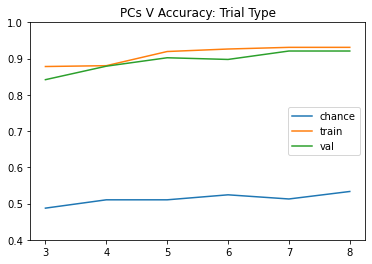

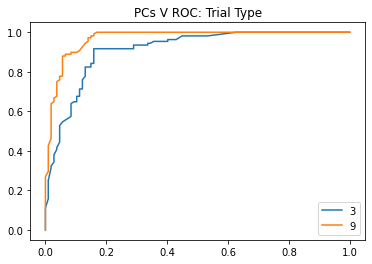

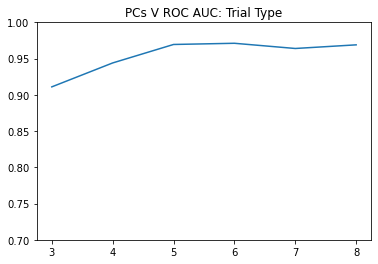

In [109]:
plotPCAROC(data, 'Trial Type', maximum)

Num PCs: 3
train acc: 0.6811594202898551, val acc: 0.6252964426877471, roc_auc: 0.7032844387755102
Num PCs: 4
train acc: 0.7564251207729469, val acc: 0.6782608695652174, roc_auc: 0.7802933673469388
Num PCs: 5
train acc: 0.7918840579710145, val acc: 0.7142292490118576, roc_auc: 0.7755102040816325
Num PCs: 6
train acc: 0.7610628019323672, val acc: 0.7320158102766797, roc_auc: 0.7955994897959182
Num PCs: 7
train acc: 0.7828019323671498, val acc: 0.7221343873517786, roc_auc: 0.7740752551020408
Num PCs: 8
train acc: 0.7962318840579711, val acc: 0.7675889328063242, roc_auc: 0.7949617346938775
Num PCs: 9
train acc: 0.7961352657004831, val acc: 0.7494071146245058, roc_auc: 0.7949617346938775
Num PCs: 10
train acc: 0.804927536231884, val acc: 0.749802371541502, roc_auc: 0.7959183673469388
Num PCs: 11
train acc: 0.7962318840579711, val acc: 0.7679841897233202, roc_auc: 0.8104272959183674
Num PCs: 12
train acc: 0.7828019323671498, val acc: 0.8035573122529645, roc_auc: 0.8201530612244896
Num PCs: 

train acc: 0.7562318840579709, val acc: 0.7047430830039525, roc_auc: 0.8043686224489796
Num PCs: 87
train acc: 0.7430917874396135, val acc: 0.6600790513833992, roc_auc: 0.8058035714285714
Num PCs: 88
train acc: 0.7387439613526571, val acc: 0.6513833992094862, roc_auc: 0.7978316326530612
Num PCs: 89
train acc: 0.7608695652173914, val acc: 0.5968379446640316, roc_auc: 0.7897002551020408
Num PCs: 90
train acc: 0.7519806763285025, val acc: 0.6324110671936759, roc_auc: 0.8066007653061223
Num PCs: 91
train acc: 0.7256038647342995, val acc: 0.6513833992094862, roc_auc: 0.7933673469387755
Num PCs: 92
train acc: 0.7474396135265701, val acc: 0.6956521739130435, roc_auc: 0.7995854591836734
Num PCs: 93
train acc: 0.7610628019323671, val acc: 0.6703557312252965, roc_auc: 0.8008609693877551
Num PCs: 94
train acc: 0.7473429951690822, val acc: 0.633201581027668, roc_auc: 0.790656887755102
Num PCs: 95
train acc: 0.7652173913043478, val acc: 0.6687747035573123, roc_auc: 0.7791772959183674
Num PCs: 96
tr

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/PCvAcc: Num Reaches.png'

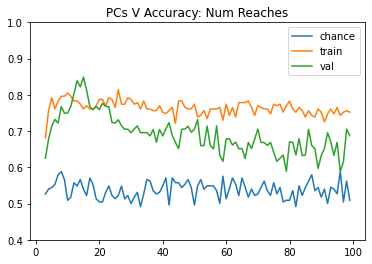

In [22]:
plotPCAROC(notNull_data, 'Num Reaches', maximum)

Num PCs: 3
train acc: 0.7867424242424242, val acc: 0.8397058823529411, roc_auc: 0.889087656529517
Num PCs: 4
train acc: 0.8475378787878789, val acc: 0.9014705882352942, roc_auc: 0.9472271914132379
Num PCs: 5
train acc: 0.8293560606060606, val acc: 0.8286764705882353, roc_auc: 0.9263565891472868
Num PCs: 6
train acc: 0.859848484848485, val acc: 0.8294117647058823, roc_auc: 0.9516994633273703
Num PCs: 7
train acc: 0.859659090909091, val acc: 0.8161764705882353, roc_auc: 0.9749552772808586
Num PCs: 8
train acc: 0.8537878787878788, val acc: 0.8529411764705882, roc_auc: 0.9675014907573047
Num PCs: 9
train acc: 0.865909090909091, val acc: 0.8772058823529412, roc_auc: 0.9752534287418009
Num PCs: 10
train acc: 0.8840909090909091, val acc: 0.8772058823529412, roc_auc: 0.9725700655933214
Num PCs: 11
train acc: 0.8598484848484848, val acc: 0.8772058823529412, roc_auc: 0.9719737626714371
Num PCs: 12
train acc: 0.8717803030303031, val acc: 0.8397058823529411, roc_auc: 0.9633273703041145
Num PCs: 13

train acc: 0.8901515151515152, val acc: 0.8044117647058823, roc_auc: 0.9776386404293381
Num PCs: 87
train acc: 0.9024621212121213, val acc: 0.8044117647058823, roc_auc: 0.9764460345855694
Num PCs: 88
train acc: 0.890340909090909, val acc: 0.7691176470588236, roc_auc: 0.9844961240310077
Num PCs: 89
train acc: 0.9024621212121213, val acc: 0.7926470588235294, roc_auc: 0.9695885509838997
Num PCs: 90
train acc: 0.8962121212121212, val acc: 0.7808823529411765, roc_auc: 0.9761478831246273
Num PCs: 91
train acc: 0.8901515151515152, val acc: 0.8161764705882353, roc_auc: 0.9743589743589743
Num PCs: 92
train acc: 0.9085227272727273, val acc: 0.8161764705882353, roc_auc: 0.9827072152653549
Num PCs: 93
train acc: 0.8901515151515152, val acc: 0.8419117647058822, roc_auc: 0.9719737626714371
Num PCs: 94
train acc: 0.8839015151515153, val acc: 0.8169117647058822, roc_auc: 0.9797257006559331
Num PCs: 95
train acc: 0.8964015151515152, val acc: 0.8294117647058823, roc_auc: 0.9770423375074537
Num PCs: 96
t

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/PCvAcc: Nonbin Which Hand.png'

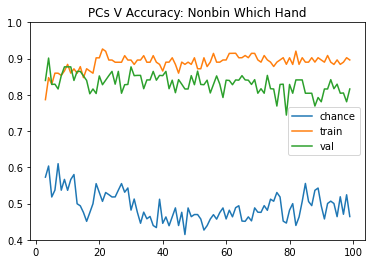

In [62]:
plotPCAROC(singleReach_data2, 'Nonbin Which Hand', maximum)

# do the same for extended

Num PCs: 3
train acc: 0.8137931034482758, val acc: 0.8232558139534885, roc_auc: 0.9294738663897543
Num PCs: 4
train acc: 0.8827586206896552, val acc: 0.9348837209302326, roc_auc: 0.9807892004153687
Num PCs: 5
train acc: 0.8850574712643677, val acc: 0.9209302325581394, roc_auc: 0.9787988923502943
Num PCs: 6
train acc: 0.9149425287356323, val acc: 0.930232558139535, roc_auc: 0.9815680166147457
Num PCs: 7
train acc: 0.9080459770114941, val acc: 0.9348837209302326, roc_auc: 0.9744288681204569
Num PCs: 8
train acc: 0.9057471264367818, val acc: 0.9348837209302326, roc_auc: 0.9765922464520596
Num PCs: 9
train acc: 0.903448275862069, val acc: 0.9255813953488372, roc_auc: 0.9762028383523711
Num PCs: 10
train acc: 0.9080459770114941, val acc: 0.9209302325581395, roc_auc: 0.9764624437521634
Num PCs: 11
train acc: 0.9126436781609195, val acc: 0.9302325581395348, roc_auc: 0.9800103842159916
Num PCs: 12
train acc: 0.9103448275862069, val acc: 0.9116279069767442, roc_auc: 0.9839910003461405
Num PCs: 

train acc: 0.903448275862069, val acc: 0.8930232558139537, roc_auc: 0.9741259951540325
Num PCs: 87
train acc: 0.9080459770114941, val acc: 0.8790697674418606, roc_auc: 0.9724818276220145
Num PCs: 88
train acc: 0.9149425287356321, val acc: 0.8883720930232559, roc_auc: 0.976159570785739
Num PCs: 89
train acc: 0.9126436781609195, val acc: 0.8883720930232559, roc_auc: 0.9750778816199377
Num PCs: 90
train acc: 0.8988505747126437, val acc: 0.8790697674418606, roc_auc: 0.9737365870543441
Num PCs: 91
train acc: 0.9080459770114941, val acc: 0.8930232558139535, roc_auc: 0.9752942194530979
Num PCs: 92
train acc: 0.9011494252873563, val acc: 0.8976744186046511, roc_auc: 0.9760730356524749
Num PCs: 93
train acc: 0.9103448275862069, val acc: 0.8930232558139535, roc_auc: 0.9748615437867775
Num PCs: 94
train acc: 0.9011494252873563, val acc: 0.874418604651163, roc_auc: 0.9715732087227414
Num PCs: 95
train acc: 0.9103448275862069, val acc: 0.8930232558139535, roc_auc: 0.9762461059190031
Num PCs: 96
tra

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/PCvAcc: Trial Type.png'

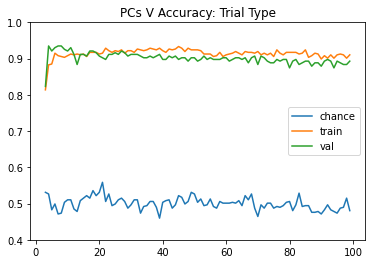

In [47]:
plotPCAROC(data_extended, 'Trial Type', maximum)

Num PCs: 3
train acc: 0.712463768115942, val acc: 0.5972332015810277, roc_auc: 0.7087053571428571
Num PCs: 4
train acc: 0.7123671497584543, val acc: 0.7221343873517786, roc_auc: 0.8190369897959184
Num PCs: 5
train acc: 0.7789371980676328, val acc: 0.7395256916996047, roc_auc: 0.8207908163265305
Num PCs: 6
train acc: 0.7521739130434782, val acc: 0.758102766798419, roc_auc: 0.821109693877551
Num PCs: 7
train acc: 0.7169082125603864, val acc: 0.7667984189723319, roc_auc: 0.8080357142857143
Num PCs: 8
train acc: 0.7391304347826088, val acc: 0.7494071146245058, roc_auc: 0.7917729591836735
Num PCs: 9
train acc: 0.7391304347826088, val acc: 0.8114624505928854, roc_auc: 0.8191964285714286
Num PCs: 10
train acc: 0.7609661835748792, val acc: 0.7312252964426876, roc_auc: 0.8097895408163266
Num PCs: 11
train acc: 0.7432850241545894, val acc: 0.7395256916996046, roc_auc: 0.8153698979591837
Num PCs: 12
train acc: 0.7387439613526571, val acc: 0.7308300395256916, roc_auc: 0.798469387755102
Num PCs: 13

train acc: 0.7521739130434784, val acc: 0.6865612648221344, roc_auc: 0.7683354591836734
Num PCs: 87
train acc: 0.7433816425120774, val acc: 0.6513833992094862, roc_auc: 0.7530293367346939
Num PCs: 88
train acc: 0.7520772946859904, val acc: 0.7320158102766797, roc_auc: 0.7614795918367347
Num PCs: 89
train acc: 0.7519806763285024, val acc: 0.6695652173913043, roc_auc: 0.7496811224489796
Num PCs: 90
train acc: 0.7478260869565218, val acc: 0.6249011857707509, roc_auc: 0.7527104591836735
Num PCs: 91
train acc: 0.7389371980676327, val acc: 0.6695652173913043, roc_auc: 0.7536670918367345
Num PCs: 92
train acc: 0.7609661835748792, val acc: 0.6703557312252965, roc_auc: 0.7536670918367346
Num PCs: 93
train acc: 0.7743961352657005, val acc: 0.6513833992094862, roc_auc: 0.7535076530612244
Num PCs: 94
train acc: 0.7697584541062803, val acc: 0.6328063241106718, roc_auc: 0.7506377551020408
Num PCs: 95
train acc: 0.7566183574879227, val acc: 0.6687747035573122, roc_auc: 0.7346938775510202
Num PCs: 96


FileNotFoundError: [Errno 2] No such file or directory: 'Plots/PCvAcc: Num Reaches.png'

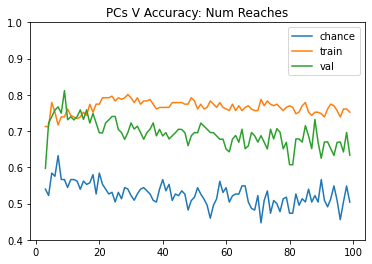

In [48]:
plotPCAROC(notNull_data_extended, 'Num Reaches', maximum)


Num PCs: 3
train acc: 0.7871212121212121, val acc: 0.7205882352941176, roc_auc: 0.8706022659511032
Num PCs: 4
train acc: 0.8170454545454546, val acc: 0.8051470588235293, roc_auc: 0.9463327370304114
Num PCs: 5
train acc: 0.8231060606060605, val acc: 0.8169117647058822, roc_auc: 0.9582587954680978
Num PCs: 6
train acc: 0.8473484848484848, val acc: 0.8183823529411764, roc_auc: 0.9540846750149076
Num PCs: 7
train acc: 0.8535984848484848, val acc: 0.8661764705882353, roc_auc: 0.9785330948121646
Num PCs: 8
train acc: 0.8352272727272727, val acc: 0.8411764705882353, roc_auc: 0.9710793082886106
Num PCs: 9
train acc: 0.8350378787878789, val acc: 0.8044117647058823, roc_auc: 0.9758497316636852
Num PCs: 10
train acc: 0.859659090909091, val acc: 0.8411764705882353, roc_auc: 0.9821109123434705
Num PCs: 11
train acc: 0.8535984848484848, val acc: 0.8411764705882353, roc_auc: 0.977638640429338
Num PCs: 12
train acc: 0.8594696969696969, val acc: 0.8544117647058822, roc_auc: 0.9800238521168755
Num PCs: 

train acc: 0.8780303030303032, val acc: 0.8286764705882353, roc_auc: 0.98479427549195
Num PCs: 87
train acc: 0.884090909090909, val acc: 0.8044117647058823, roc_auc: 0.9877757901013715
Num PCs: 88
train acc: 0.8776515151515152, val acc: 0.8044117647058823, roc_auc: 0.9874776386404294
Num PCs: 89
train acc: 0.884090909090909, val acc: 0.8169117647058822, roc_auc: 0.9836016696481813
Num PCs: 90
train acc: 0.9024621212121213, val acc: 0.8161764705882353, roc_auc: 0.9856887298747764
Num PCs: 91
train acc: 0.896590909090909, val acc: 0.8161764705882353, roc_auc: 0.9803220035778175
Num PCs: 92
train acc: 0.890340909090909, val acc: 0.8044117647058823, roc_auc: 0.9838998211091234
Num PCs: 93
train acc: 0.8964015151515152, val acc: 0.8161764705882353, roc_auc: 0.9827072152653548
Num PCs: 94
train acc: 0.9022727272727273, val acc: 0.8044117647058823, roc_auc: 0.992248062015504
Num PCs: 95
train acc: 0.877840909090909, val acc: 0.8161764705882353, roc_auc: 0.9853905784138343
Num PCs: 96
train ac

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/PCvAcc: Nonbin Which Hand.png'

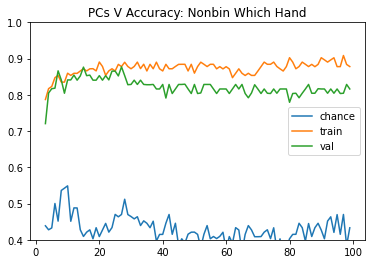

In [69]:
plotPCAROC(singleReach_data2_extended, 'Nonbin Which Hand', maximum)

# DO FULL CLASSIFICATION

0.0    325
1.0    325
Name: Trial Type, dtype: int64


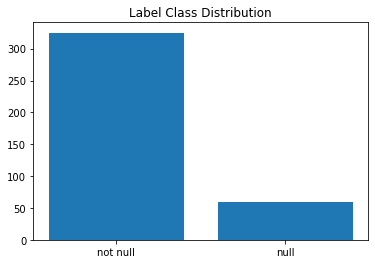

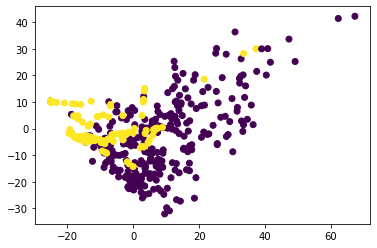

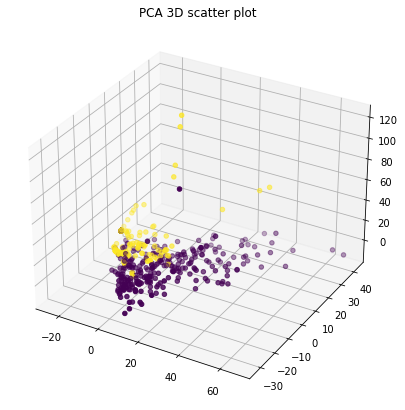

Avg cv accuracy: 0.522
Avg cv accuracy: 0.924
Avg cv accuracy: 0.916


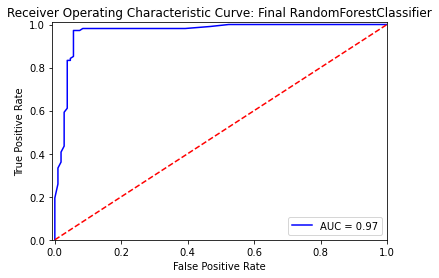

In [70]:
# null v not null
null_classifier = classifier(data, 'Trial Type')
convert_dict = { 0:"not null", 1:"null"}
null_classifier.main(convert_dict, sn_k=False)

0.0    169
1.0    169
Name: Num Reaches, dtype: int64


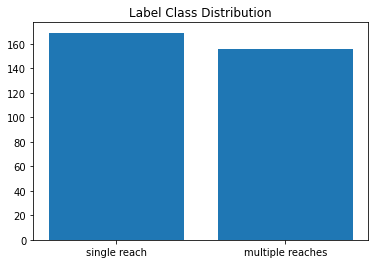

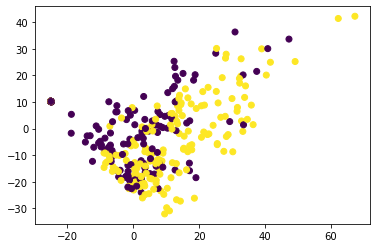

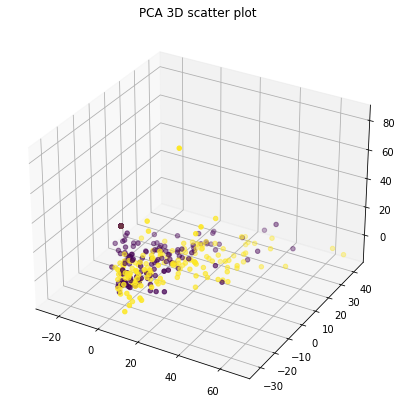

Avg cv accuracy: 0.549
Avg cv accuracy: 0.708
Avg cv accuracy: 0.58


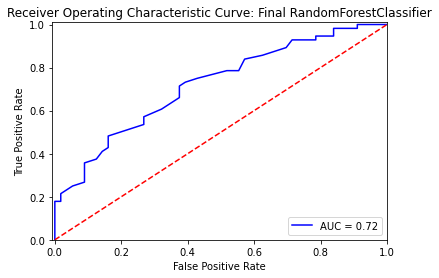

In [71]:
# single v multiple
reaches_classifier = classifier(notNull_data, 'Num Reaches')
convert_dict = { 0:"single reach", 1:"multiple reaches"}
reaches_classifier.main(convert_dict, sn_k=False)

0.0    123
1.0    123
Name: Nonbin Which Hand, dtype: int64


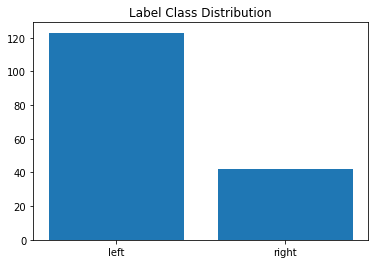

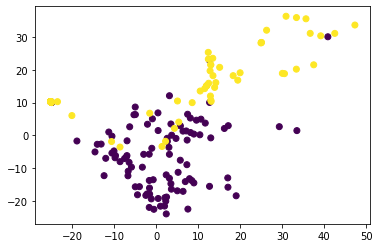

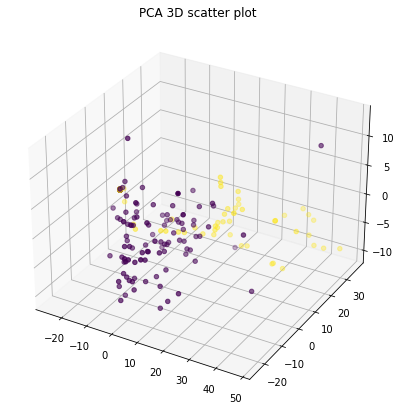

Avg cv accuracy: 0.494
Avg cv accuracy: 0.89
Avg cv accuracy: 0.805


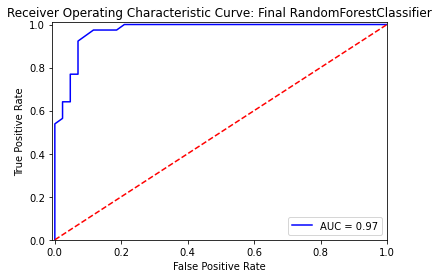

In [72]:
# l v r
reaches_classifier = classifier(singleReach_data2, 'Nonbin Which Hand')
convert_dict = { 0:"left", 1:"right"}
reaches_classifier.main(convert_dict, sn_k=False)

In [ ]:
print(

# Compare MODELS

In [73]:
def plotModelsvAcc(data, y_name, models):
    # define data holding lists
    all_chance = []
    all_trainAcc = []
    all_valAcc = []
    all_ROC = []
    all_ROCAUC = []
    names = []

    # for each # of PCs 1, 2...n to use
    for modelInfo in models:
        model1, model2, name = modelInfo
        classifier(data, 'Trial Type').main_PCvROC(model1, model2)

        # do classification
        chance_score, train_score, val_score, roc, roc_auc = classifier(data, y_name).main_PCvROC(model1, model2)
        all_chance.append(chance_score)
        all_trainAcc.append(train_score)
        all_valAcc.append(val_score)
        all_ROC.append(roc)
        all_ROCAUC.append(roc_auc)
        names.append(name)

    # plot
    fig = plt.figure()
    #plt.ylim([0.4, 1.0]) # y axis range fixed to be 0.40 to 1.00
    plt.title(f"Models V Accuracy: {y_name}")
    x_axis = np.arange(len(models))
    width = 0.2
    plt.bar(x_axis+width, all_chance, width, label="chance")
    plt.bar(x_axis+width*2, all_trainAcc, width, label="train")
    plt.bar(x_axis+width*3,  all_valAcc, width, label="val")
    plt.bar(x_axis+width*4,  all_ROCAUC, width, label="roc auc")
    plt.xticks(x_axis+width, names)
    plt.legend()
    plt.savefig(f"Plots/ModelsvAcc: {y_name}")

    fig = plt.figure()
    plt.title(f"Models V ROC: {y_name}")
    for i in range(0, len(models)):
        fpr, tpr = all_ROC[i]
        plt.plot(fpr, tpr, label=names[i])
    plt.legend()
    plt.savefig(f"Plots/ModelsvROC: {y_name}")

    #fig = plt.figure()
    #plt.ylim([0.7, 1.0]) # y axis range to be 0.70-1.00
    #plt.title(f"PModels V ROC AUC: {y_name}")
    #plt.plot(NumPCsArray, all_ROCAUC)
    #plt.savefig(f"Plots/ModelsvROCAUC: {y_name}")

In [74]:
models = [
    [RandomForestClassifier(n_estimators=150), RandomForestClassifier(n_estimators=150), "RaForest"],
    [LogisticRegression(), LogisticRegression(), "LogRegr"],
    [SVC(kernel='linear', probability=True), SVC(kernel='linear', probability=True), "SVM"],
    [LDA(), LDA(), "LDA"],
    [neighbors.KNeighborsClassifier(n_neighbors=5),  neighbors.KNeighborsClassifier(n_neighbors=5), "KNN"],
    [AdaBoostClassifier(n_estimators=100, random_state=0), AdaBoostClassifier(n_estimators=100, random_state=0), "AdaBoost"]
    
]

train acc: 0.9126436781609195, val acc: 0.8604651162790697, roc_auc: 0.956386292834891
train acc: 0.9103448275862069, val acc: 0.8604651162790697, roc_auc: 0.9593284873658705
train acc: 0.9701149425287356, val acc: 0.9069767441860466, roc_auc: 0.9803565247490481
train acc: 0.9701149425287356, val acc: 0.9069767441860466, roc_auc: 0.9803565247490481
train acc: 0.9908045977011494, val acc: 0.9395348837209301, roc_auc: 0.9792315680166147
train acc: 0.9908045977011494, val acc: 0.9395348837209301, roc_auc: 0.9792315680166147
train acc: 0.9977011494252874, val acc: 0.8976744186046511, roc_auc: 0.9776739356178608
train acc: 0.9977011494252874, val acc: 0.8976744186046511, roc_auc: 0.9776739356178608
train acc: 0.8988505747126437, val acc: 0.9069767441860466, roc_auc: 0.9668570439598477
train acc: 0.8988505747126437, val acc: 0.9069767441860466, roc_auc: 0.9668570439598477
train acc: 0.9494252873563218, val acc: 0.9162790697674419, roc_auc: 0.9833852544132919
train acc: 0.9494252873563218, va

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/ModelsvAcc: Trial Type.png'

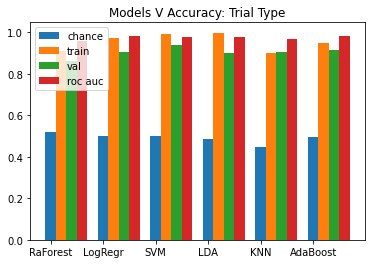

In [75]:
plotModelsvAcc(data, 'Trial Type', models)

# LDA

In [ ]:
# TODO

# DEBUGGING BELOW

# Classification Broken Down (TRIAL TYPE)

In [76]:
# define classification

def filter_y(df, y_name):
    new_df = df.copy()
    for col in new_df.columns:
        if (not "PC" in col) and (col!=y_name):
            new_df= new_df.drop([col], axis=1)
    X = new_df.drop([y_name], axis=1)
    y = new_df[y_name]#.to_frame()
    return new_df, X, y

n_data, n_X, n_y = filter_y(data, 'Trial Type')
n_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC376,PC377,PC378,PC379,PC380,PC381,PC382,PC383,PC384,Trial Type
0,-14.556057,-5.058066,-0.571175,-2.920855,-8.386121,7.504464,6.444057,-7.264459,-0.418094,2.485311,...,1.837755e-49,-3.090164e-50,3.265268e-51,3.003924e-52,-4.037851e-53,-5.230453e-54,5.490369e-55,4.259852e-56,1.068980e-57,0.0
1,4.707227,-0.936269,-1.807046,-7.266202,-1.458812,9.150883,1.554896,-8.545136,-1.836478,9.369906,...,-1.712243e-30,-1.575467e-30,-2.028343e-30,-1.368866e-30,-2.032463e-30,1.705671e-30,-9.262823e-31,3.879452e-30,-1.120993e-30,0.0
2,0.419825,6.866147,-2.149633,-8.179890,0.926190,0.853460,5.812632,2.326269,3.547956,-3.530746,...,1.500066e-31,-1.092412e-30,-2.198255e-30,-1.421606e-30,-1.809522e-30,9.950310e-31,-3.586280e-30,2.766589e-30,-1.919544e-30,0.0
3,-7.526640,-7.069065,-0.442580,-0.641086,-2.679941,4.926130,12.554484,-4.487274,-1.430359,-2.942291,...,6.754586e-31,-3.211333e-31,-2.665724e-30,-4.089123e-30,-1.356938e-31,8.315933e-31,-9.855306e-31,5.613979e-31,-2.066304e-30,0.0
4,-8.290526,-9.224430,-1.762426,1.049623,-4.574921,5.671087,5.711493,-4.813216,-0.805555,0.750168,...,4.210669e-31,3.704540e-31,8.409498e-31,-3.104158e-30,6.002403e-31,1.216842e-30,-2.343013e-30,1.074061e-30,-2.724215e-30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-24.890528,10.101036,-0.916601,-0.501549,3.241741,-2.938186,-2.004111,0.363024,-0.105066,0.833075,...,-2.171858e-16,-3.859235e-15,-5.548194e-16,2.418917e-15,2.265237e-15,-1.753279e-15,2.461399e-15,-4.863985e-16,-1.471152e-15,1.0
380,-24.934423,10.156373,-0.958768,-0.529223,3.247984,-2.980272,-2.010161,0.357387,-0.033360,0.873913,...,-1.715181e-16,5.714499e-16,1.921240e-15,-1.605500e-16,1.143569e-15,9.966396e-16,2.092572e-16,1.515732e-15,-7.415135e-16,1.0
381,-25.015489,10.254962,-1.042526,-0.601094,3.285232,-3.065936,-2.042245,0.380357,0.102797,1.011708,...,-8.619209e-16,-2.445468e-16,4.662612e-16,7.523853e-16,-2.623348e-16,3.932041e-16,1.450164e-16,-2.564869e-16,2.243730e-16,0.0
382,-24.948585,10.232479,-0.981323,-0.522696,3.292314,-3.069122,-1.883164,0.235879,0.095495,0.842896,...,-2.405164e-16,-1.997092e-15,-8.742199e-16,-3.750185e-16,-9.141612e-16,4.573644e-16,1.345306e-15,-1.511705e-15,4.155349e-16,1.0


In [ ]:
# todo normalize / standardize 

# Apply SMOTE to Null Trials

In [77]:
# https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

def adjust_class_imbalance(X, y):
    """
    Adjusts for class imbalance.
        Object to over-sample the minority class(es) by picking samples at random with replacement.
        The dataset is transformed, first by oversampling the minority class, then undersampling the majority class.
    Returns: new samples
    References: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
    """
    oversampler = SMOTE(random_state=42)
    #undersampler = RandomUnderSampler(random_state=42)
    steps = [('o', oversampler)] #, ('u', undersampler)]
    pipeline = Pipeline(steps=steps)
    X_res, y_res = pipeline.fit_resample(X, y)
    return X_res, y_res

def plot_scatter(X, y):
    """
    Return Scatter Plot
    X: Df
    y: Series
    """
    # summarize class distribution
    counter = y.value_counts()
    print(counter)

    # scatter plot of examples by class label
    plt.figure()
    plt.scatter(X["PC1"].values, X["PC2"].values, c=y.values)
    plt.show()

0.0    325
1.0     59
Name: Trial Type, dtype: int64


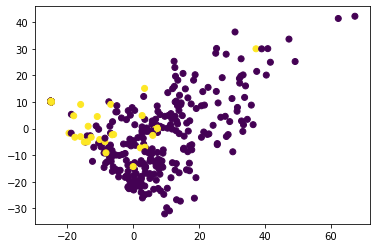

In [78]:
plot_scatter(n_X, n_y)

0.0    325
1.0    325
Name: Trial Type, dtype: int64


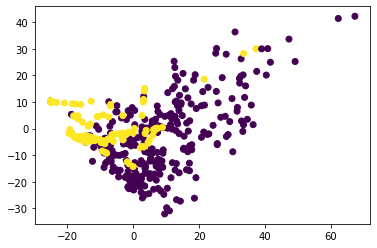

In [79]:

sn_X, sn_y = adjust_class_imbalance(n_X, n_y)
plot_scatter(sn_X, sn_y)

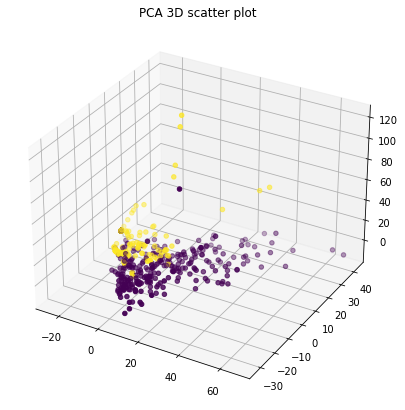

In [80]:
def plot_scatter_3D(X, y):
    """
    Return Scatter Plot
    X: Df
    y: Series
    """
    a = X["PC1"].values
    b = X["PC2"].values
    c = X["PC3"].values
    
    # Creating figure
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    # Creating plot
    ax.scatter3D(a, b, c, c=y.values)
    plt.title("PCA 3D scatter plot")

    # show plot
    plt.show()
    
plot_scatter_3D(sn_X, sn_y)

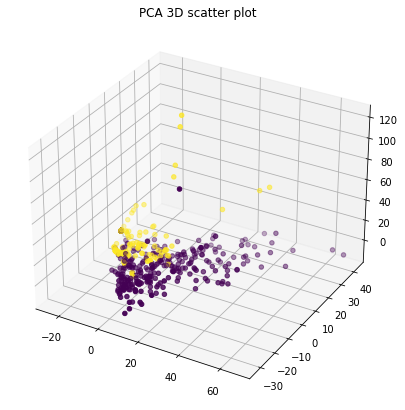

In [81]:
plot_scatter_3D(sn_X, sn_y)

In [82]:
def plot_class_balance(y, convert_dict):
    counts = y.replace(convert_dict).value_counts()
    x_labels = list(convert_dict.values())
    plt.figure()
    plt.bar(x_labels, counts.values)
    plt.title("Label Class Distribution");


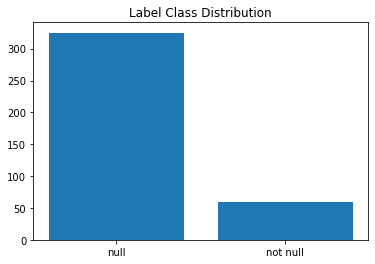

In [83]:
convert_dict = {1:"null", 0:"not null"}
plot_class_balance(n_y, convert_dict)

# Classify Null v Not Null

## Create 1/3 holdout set

In [84]:
def split(X, Y):
    # Split into training+validation and test set (33%)
    X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=10) 

    # Split into training and validation set (33%)
    X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size = 0.33, random_state=10) 

    print(f" X_train size {X_train.shape} \n X_val size {X_val.shape}\n X_test size {X_test.shape}.")
    return X_train, X_val, Y_train, Y_val, X_test, Y_test


In [85]:
sn_X_train, sn_X_val, sn_Y_train, sn_Y_val, sn_X_test, sn_Y_test = split(sn_X, sn_y)

 X_train size (291, 384) 
 X_val size (144, 384)
 X_test size (215, 384).


## Determine Chance

In [86]:
def find_chance(y):
    y = y.copy()
    y = shuffle(y, random_state=42)
    return y.reset_index(drop=True)

In [87]:
shuffled_sn_y_train = find_chance(sn_Y_train)
shuffled_sn_y_train

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
286    0.0
287    1.0
288    1.0
289    0.0
290    1.0
Name: Trial Type, Length: 291, dtype: float64

In [88]:
#For reproducibility 
#all models
random_state = 10

# Initial Accuracies

In [89]:
def initial_accuracy(X_train, Y_train):
    # Initial Accuracy
    model = RandomForestClassifier(random_state=random_state)
    model.fit(X_train, np.ravel(Y_train))
    score = np.mean(cross_val_score(model, X_train, np.ravel(Y_train), scoring='accuracy', cv=5)) 
    print(f"Initial avg cv accuracy: {np.round(score, 3)}")
    
    # metrics.f1_score(np.ravel(Y_val), model.predict(X_val)) 

In [90]:
# No tuning
initial_accuracy(sn_X_train, sn_Y_train)

Initial avg cv accuracy: 0.914


In [91]:
# Chance
initial_accuracy(sn_X_train, shuffled_sn_y_train)

Initial avg cv accuracy: 0.526


## Hypterparameter Tuning

In [92]:
# N_estimators # Fixed at 150
def tune_hyperparams(X_train, Y_train):
    # Tuning hyperparameters for RandomForestClassifier
    # may take a bit to run
    # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

    # creat model
    model = RandomForestClassifier(random_state=random_state) 

    # define hyperparameter to tune
    n_estimators = [10, 50, 100, 200, 600, 800, 1000]  # make smaller to reduce runtime if necessary

    # define cross validation grid search
    grid = dict(n_estimators=n_estimators)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, np.ravel(Y_train))

    # summarize results
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']

    # plot
    plt.plot([p['n_estimators'] for p in params], means,marker='o', color='orange')
    plt.title("Random Forest Classifier: # Trees in Forest vs Accuracy")
    plt.xlabel("n_estimators (The number of trees in the forest)")
    plt.ylabel("CV Accuracy");

    # define best n_estimators
    n_estimators = grid_result.best_params_['n_estimators']
    return n_estimators


In [93]:
sn_n_estimators = 150 #tune_hyperparams(sn_X_train, sn_Y_train)
sn_n_estimators

150

In [94]:
# Depth of trees
def tune_hyperparams(X_train, Y_train):
    # Tuning hyperparameters for RandomForestClassifier
    # may take a bit to run
    # reference https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

    # creat model
    model = RandomForestClassifier(random_state=random_state) 

    # define hyperparameter to tune
    max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]  # make smaller to reduce runtime if necessary

    # define cross validation grid search
    grid = dict(max_depth=max_depth)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, np.ravel(Y_train))

    # summarize results
    print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    params = grid_result.cv_results_['params']

    # plot
    plt.plot([p['max_depth'] for p in params], means,marker='o', color='orange')
    plt.title("Random Forest Classifier: Max Depth of Trees vs Accuracy")
    plt.xlabel("n_estimators (Max Depth of Trees)")
    plt.ylabel("CV Accuracy");

    # define best n_estimators
    best_max_depth = grid_result.best_params_['max_depth']
    return best_max_depth

In [95]:
sn_max_depth = None#tune_hyperparams(sn_X_train, sn_Y_train)
sn_max_depth

## Visualize Feature Importances

In [96]:
def vis_feat_importance(X_train, Y_train):
    # Visualize best features
    selector = SelectKBest(score_func=f_classif, k=3)  # f_classif: ANOVA F-value between label/feature for classification tasks.
    z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X and k
    filter = selector.get_support() # mask for selected features
    features = np.array(X_train.columns) # all feature names 

    # create series for plotting
    forest_importances = pd.Series(selector.scores_, index=features)

    # sort in descending order
    forest_importances = forest_importances.sort_values(ascending=False)

    # print top 3 features
    print(f"3 Most Important Features: {features[filter]}")

    # plot
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    ax.set_ylabel("ANOVA F-value (f_classif)")
    ax.set_xlabel("Features");


3 Most Important Features: ['PC1' 'PC2' 'PC7']


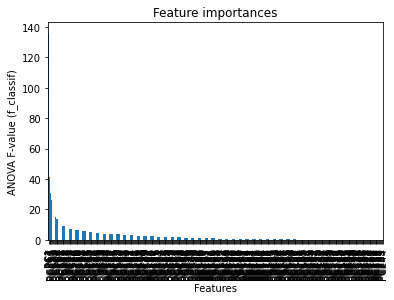

In [102]:
vis_feat_importance(sn_X_train, sn_Y_train)

In [101]:
def best_k_features(X_train, Y_train, n_estimators):
    # Visualize Accuracy vs Number of Features
    # may take a bit to run
    accuracies = []
    n = X_train.shape[1]+1 # num cols
    for k in np.arange(1, n): 
      selector = SelectKBest(score_func=f_classif, k=k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
      z = selector.fit_transform(X_train, np.ravel(Y_train))  # temp new X
      filter = selector.get_support() # mask for selected features

      # create, fit, and score model on k features
      model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)  # use best n_estimators from previous part
      model.fit(z, np.ravel(Y_train))
      scores = cross_val_score(model, z, np.ravel(Y_train), cv=3) # 3-fold cv to reduce time to run
      accuracies.append(np.mean(scores))

    # print best k
    a_dictionary = dict(zip(np.arange(1, n), accuracies))
    max_key = max(a_dictionary, key=a_dictionary.get)
    print(f"max accuracy {max(accuracies)} with k={max_key}.")

    # plot
    plt.plot(np.arange(1, n), accuracies, marker='v', color='green')
    plt.title("Random Forest Classifier: Number of Features vs Accuracy")
    plt.xlabel("k (# of most important features used)")
    plt.ylabel("CV Accuracy");
    plt.xticks(np.arange(1, n));

    # define best k
    k = max_key
    return k


max accuracy 0.9347079037800688 with k=109.


109

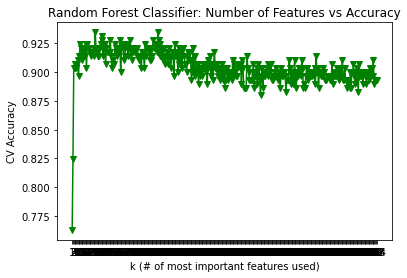

In [100]:
sn_k = best_k_features(sn_X_train, sn_Y_train, sn_n_estimators)
sn_k

In [ ]:
# Using best hyperparams

# create, fit, and score model on training data
#selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
#z = selector.fit_transform(sn_X_train, np.ravel(sn_Y_train))  # new X

#model = RandomForestClassifier(n_estimators=sn_n_estimators, random_state=random_state)
#model.fit(z, np.ravel(sn_Y_train))
#score = np.mean(cross_val_score(model, z, np.ravel(sn_Y_train), cv=5))
#print(f"Training avg cv training accuracy: After Tuning {np.round(score, 2)}")

selector = SelectKBest(score_func=f_classif, k=sn_k)  # f_classif: ANOVA F-value between label/feature for classification tasks.
z = selector.fit_transform(sn_X_val, np.ravel(sn_Y_val))  # new X
model = RandomForestClassifier(n_estimators=sn_n_estimators, max_depth=sn_max_depth, random_state=10)
classifier.score_model(z, sn_Y_val, model)

In [ ]:
def plot_ROC(X_test, Y_test):
    # ROC CURVE
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(np.ravel(Y_test), preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # plot ROC
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.title('Receiver Operating Characteristic Curve: Final RandomForestClassifier')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.008, 1])
    plt.ylim([0, 1.01]) # changed to better view curve at 1.0
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return Y_test, preds

In [ ]:
sn_Y_val.unique()

In [ ]:
temp_X = selector.transform(sn_X_val)
Y_test, preds = plot_ROC(temp_X, sn_Y_val)

# BROKEN DOWN CLASSIFICATION (NUM REACHES)